# **SERIES DE FOURIER DISCRETAS**

Añadimos las librerías necesarias para que todo funcione correctamente.

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import time
import imageio

In [22]:
def DFT(x):
    """
    Calcula la Transformada Discreta de Fourier (DFT) de una señal de entrada x.
    
    Parámetros:
    x : señal de entrada en el dominio del tiempo.
    
    Retorna:
    X : Transformada Discreta de Fourier de la señal x.
    """
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x)

    return X

In [20]:
def frequ(x, sr):
    """
    Calcula y representa el espectro de frecuencia de una señal dada mediante su Transformada Discreta de Fourier (DFT).
    
    Parámetros:
    x  : señal de entrada.
    sr : frecuencia de muestreo.
    """
    X = DFT(x)
    N = len(X)
    n = np.arange(N)
    T = N / sr
    freq = n / T

    n_oneside = N // 2
    f_oneside = freq[:n_oneside]
    X_oneside = X[:n_oneside] / n_oneside

    plt.figure(figsize=(12, 6))
    plt.stem(f_oneside, abs(X_oneside), 'b', markerfmt=" ", basefmt="-b")
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud |X(f)|')
    plt.tight_layout()
    plt.show()

    return

Probamos las funciones que hemos construido.

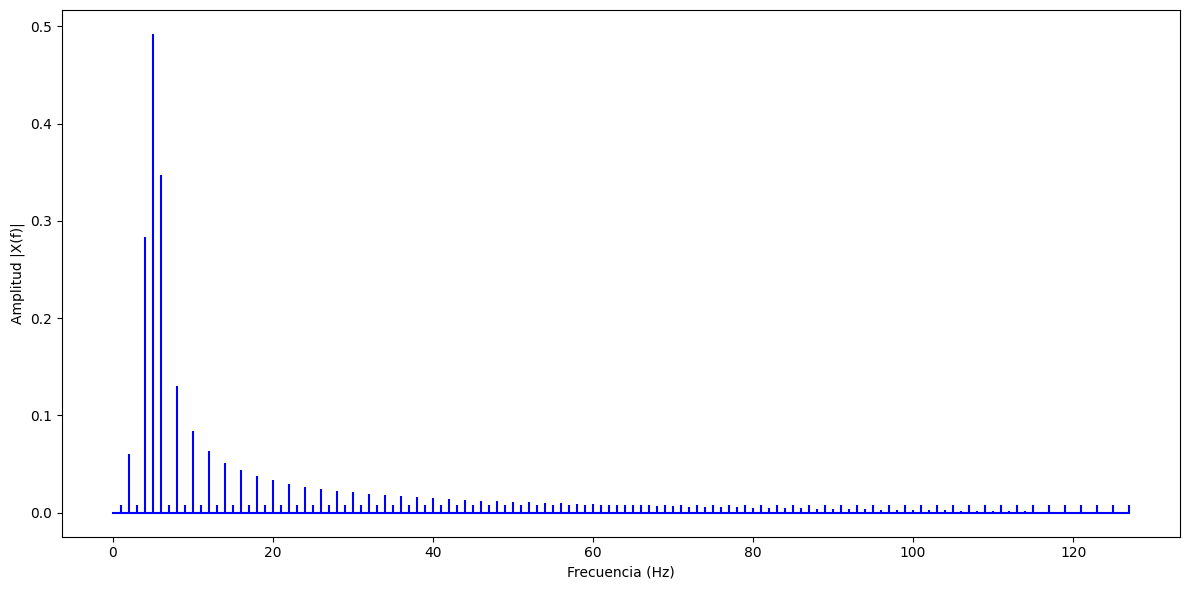

In [23]:
# Frecuencia de muestreo
sr = 256  

# Intervalo de muestreo
ts = 1.0 / sr  
t = np.arange(0, 1, ts)  

# Frecuencia de la señal del coseno
freq = 1.0  

# Señal coseno definida por partes en el intervalo [0,1]
y = np.piecewise(t, [t <= 0.5, t > 0.5], [0, lambda t: np.cos(10 * np.pi * freq * t)])

# Llamamos a la función definida para representar el espectro de frecuencia
frequ(y, sr)

Diseñamos un ejemplo que simula el caso real.

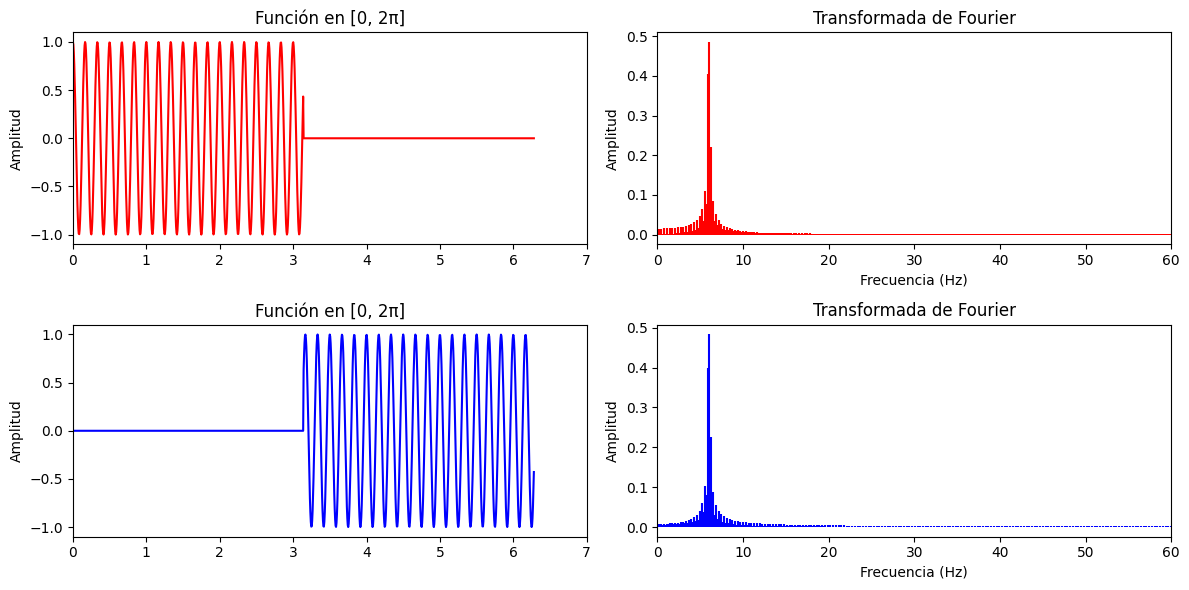

In [11]:
sr = 162.9  # Frecuencia de muestreo
ts = 1.0 / sr  
t = np.arange(0, 2 * np.pi, ts)  

# Primera señal (roja)
x = np.piecewise(t, [t < np.pi, t >= np.pi], [lambda t: np.cos(12 * np.pi * t), 0])

# Segunda señal (azul)
y = np.piecewise(t, [t < np.pi, t >= np.pi], [0, lambda t: np.cos(12 * np.pi * t)])

# DFT de cada señal
X = DFT(x)
Y = DFT(y)

N = len(X)
M = len(Y)
n = np.arange(N)
m = np.arange(M)
T = N / sr
U = M / sr
freqX = n / T
freqY = m / U
n_oneside = N // 2
f_oneside = freqX[:n_oneside]
X_oneside = X[:n_oneside] / n_oneside
m_oneside = M // 2
g_oneside = freqY[:m_oneside]
Y_oneside = Y[:m_oneside] / m_oneside

# Crear mosaico 2x2
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

# Señal roja
axs[0, 0].plot(t, x, 'r')
axs[0, 0].set_title("Función en [0, 2π]")
axs[0, 0].set_xlim(0, 7)
axs[0, 0].set_ylabel("Amplitud")

# FFT roja
axs[0, 1].stem(g_oneside, abs(Y_oneside), 'r', markerfmt=" ", basefmt=" ")
axs[0, 1].set_title("Transformada de Fourier")
axs[0, 1].set_xlim(0, 60)
axs[0, 1].set_ylabel("Amplitud")
axs[0, 1].set_xlabel("Frecuencia (Hz)")

# Señal azul
axs[1, 0].plot(t, y, 'b')
axs[1, 0].set_title("Función en [0, 2π]")
axs[1, 0].set_xlim(0, 7)
axs[1, 0].set_ylabel("Amplitud")

# FFT azul
axs[1, 1].stem(f_oneside, abs(X_oneside), 'b', markerfmt=" ", basefmt=" ")
axs[1, 1].set_title("Transformada de Fourier")
axs[1, 1].set_xlim(0, 60)
axs[1, 1].set_ylabel("Amplitud")
axs[1, 1].set_xlabel("Frecuencia (Hz)")

plt.tight_layout()
plt.show()

# **TRANSFORMADA RÁPIDA DE FOURIER (FFT)**

In [12]:
def FFT(x):
    """
    Implementación recursiva de la Transformada Rápida de Fourier (FFT) 
    mediante el algoritmo Cooley-Tukey. La longitud de la entrada debe ser 
    una potencia de 2.
    
    Parámetros:
    x : señal de entrada en el dominio del tiempo.

    Retorna:
    X : Transformada de Fourier de la señal x.
    """
    N = len(x)

    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)

        X = np.concatenate([
            X_even + factor[:int(N / 2)] * X_odd,
            X_even + factor[int(N / 2):] * X_odd
        ])
        
        return X

In [13]:
def gen_sig(sr):
    """
    Genera una señal unidimensional simple con una determinada frecuencia de muestreo.
    
    Parámetros:
    sr : frecuencia de muestreo.

    Retorna:
    x : señal sinusoidal generada.
    """
    ts = 1.0 / sr
    t = np.arange(0, 1, ts)

    freq = 1.0
    x = 3 * np.sin(2 * np.pi * freq * t)

    return x

Comparamos los tiempos de ejecución.

In [14]:
# Frecuencia de muestreo = 2048
sr = 2048
# Cálculo del tiempo
%timeit FFT(gen_sig(sr))

31 ms ± 8.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
# Frecuencia de muestreo = 2048
sr = 2048
# Cálculo del tiempo
%timeit DFT(gen_sig(sr))

382 ms ± 18.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


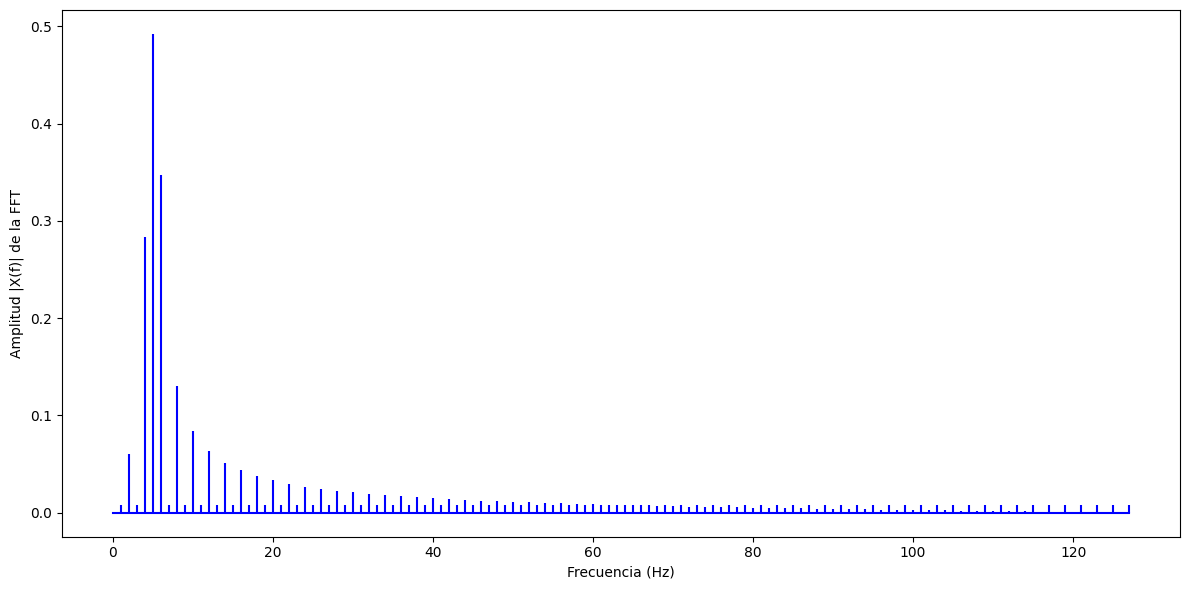

In [16]:
# Frecuencia de muestreo
sr = 256  

# Intervalo de muestreo
ts = 1.0 / sr  
t = np.arange(0, 1, ts)  

# Frecuencia de la señal del coseno
freq = 1.0  

# Señal coseno definida por partes en el intervalo [0,1]
y = np.piecewise(t, [t <= 0.5, t > 0.5], [0, lambda t: np.cos(10 * np.pi * freq * t)])

# Aplicamos la Transformada Rápida de Fourier (FFT)
X = FFT(y)

# Definición del eje de frecuencias
N = len(X)
n = np.arange(N)
T = N / sr
freq = n / T

# Selección de la parte positiva del espectro
n_oneside = N // 2
f_oneside = freq[:n_oneside]
X_oneside = X[:n_oneside] / n_oneside

# Representación del espectro de amplitud
plt.figure(figsize=(12, 6))
plt.stem(f_oneside, abs(X_oneside), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud |X(f)| de la FFT')
plt.tight_layout()
plt.show()

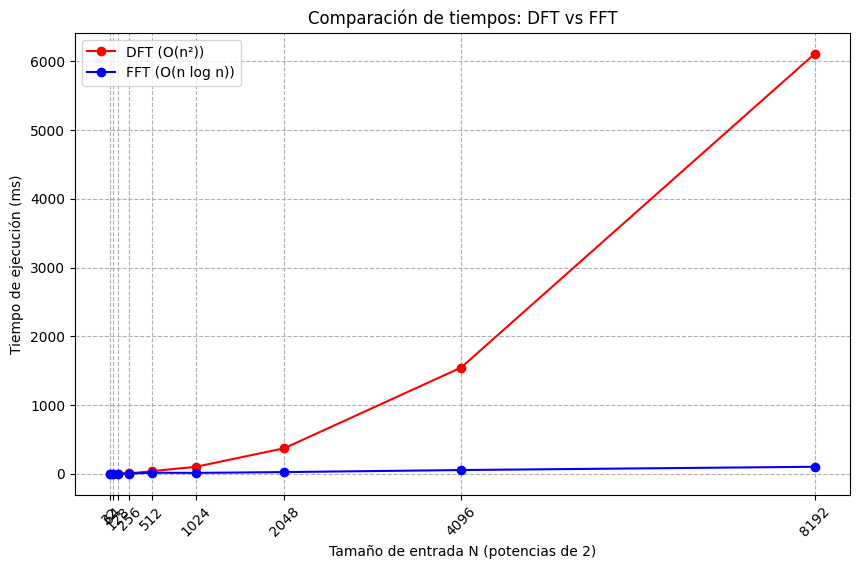

In [18]:
# Definir los tamaños de entrada N como potencias de dos. Desde 2^5 hasta 2^14.
N_values = 2**np.arange(5, 14)
dft_times = []
fft_times = []

# Evaluar tiempos de ejecución
for N in N_values:
    x = np.random.random(N)  

    # Medir tiempo DFT en milisegundos
    start = time.time()
    DFT(x)
    dft_times.append((time.time() - start) * 1000) 

    # Medir tiempo FFT en milisegundos
    start = time.time()
    FFT(x)
    fft_times.append((time.time() - start) * 1000) 

# Representar resultados
plt.figure(figsize=(10, 6))
plt.plot(N_values, dft_times, 'ro-', label="DFT (O(n²))")  
plt.plot(N_values, fft_times, 'bo-', label="FFT (O(n log n))") 

# Asegurar que todos los valores de N sean visibles
plt.xticks(N_values, labels=[str(N) for N in N_values], rotation=45)

plt.xlabel("Tamaño de entrada N (potencias de 2)")
plt.ylabel("Tiempo de ejecución (ms)")
plt.title("Comparación de tiempos: DFT vs FFT")
plt.legend()
plt.grid(True, linestyle="--")
plt.show()

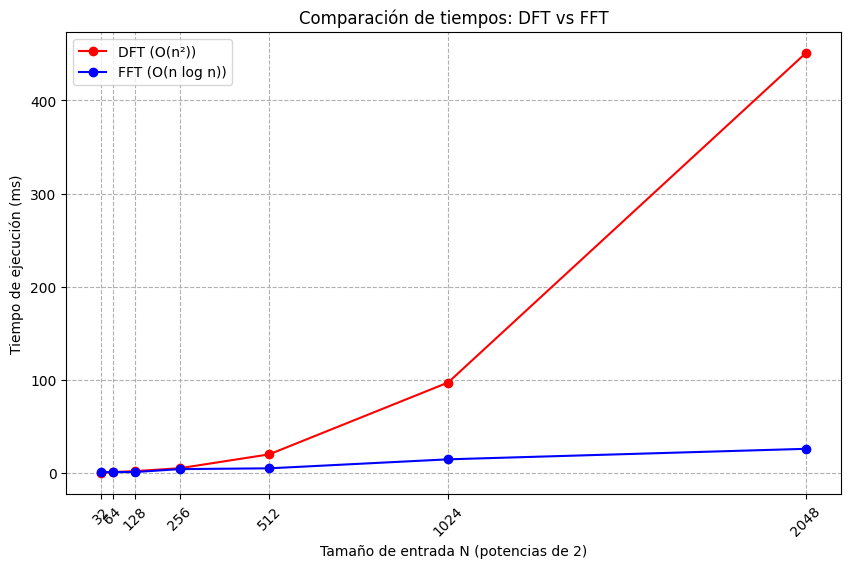

In [19]:
# Definir los tamaños de entrada N como potencias de dos. Desde 2^5 hasta 2^14.
N_values = 2**np.arange(5, 12) 
dft_times = []
fft_times = []

# Evaluar tiempos de ejecución
for N in N_values:
    x = np.random.random(N)  

    # Medir tiempo DFT en milisegundos
    start = time.time()
    DFT(x)
    dft_times.append((time.time() - start) * 1000)

    # Medir tiempo FFT en milisegundos
    start = time.time()
    FFT(x)
    fft_times.append((time.time() - start) * 1000)

# Representar los resultados
plt.figure(figsize=(10, 6))
plt.plot(N_values, dft_times, 'ro-', label="DFT (O(n²))") 
plt.plot(N_values, fft_times, 'bo-', label="FFT (O(n log n))") 

# Asegurar que todos los valores de N sean visibles
plt.xticks(N_values, labels=[str(N) for N in N_values], rotation=45)

plt.xlabel("Tamaño de entrada N (potencias de 2)")
plt.ylabel("Tiempo de ejecución (ms)")
plt.title("Comparación de tiempos: DFT vs FFT")
plt.legend()
plt.grid(True, linestyle="--")
plt.show()

# **TRANSFORMADA WAVELET DISCRETA (DWT)**

In [24]:
def DWT(n, datos):
    """
    Calcula y representa la Transformada Wavelet Discreta (DWT) utilizando filtros de coeficientes y desplazamientos circulares.

    Parámetros:
    n      : tamaño de la señal (debe ser una potencia de dos).
    datos  : señal de entrada.

    Retorna:
    Gráfica de la señal original y sus coeficientes después de la aplicación de los filtros.
    """
    b3 = (1 + np.sqrt(3)) / (4 * np.sqrt(2))
    b2 = (3 + np.sqrt(3)) / (4 * np.sqrt(2))
    b1 = (3 - np.sqrt(3)) / (4 * np.sqrt(2))
    b0 = (1 - np.sqrt(3)) / (4 * np.sqrt(2))

    N = n
    assert (N & (N - 1)) == 0, "N debe ser una potencia de dos."

    BN = np.zeros((N // 2, N))
    AN = np.zeros((N // 2, N))

    for i in range(N // 2):
        for j in range(4):
            BN[i, (2 * i + j) % N] = [b3, b2, b1, b0][j]
        for j in range(4):
            AN[i, (2 * i + j) % N] = [b0, -b1, b2, -b3][j]

    BN_aplicada = BN @ datos
    AN_aplicada = AN @ datos

    coeficientes_comb = np.concatenate((BN_aplicada, AN_aplicada))

    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(datos, label="Función", marker='o', color="blue")
    plt.title("Función de los datos")
    plt.xlabel("Índice")
    plt.ylabel("Valor")
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.stem(range(len(BN_aplicada)), BN_aplicada, basefmt=" ", linefmt='r-', markerfmt='ro', label="Coeficientes BN")
    plt.stem(range(len(AN_aplicada), len(coeficientes_comb)), AN_aplicada, basefmt=" ", linefmt='g-', markerfmt='go', label="Coeficientes AN")
    plt.title("Coeficientes de BN y AN")
    plt.xlabel("Índice")
    plt.ylabel("Coeficientes")
    plt.legend()

    plt.tight_layout()
    plt.show()
    return

Probamos los filtros que hemos diseñado.

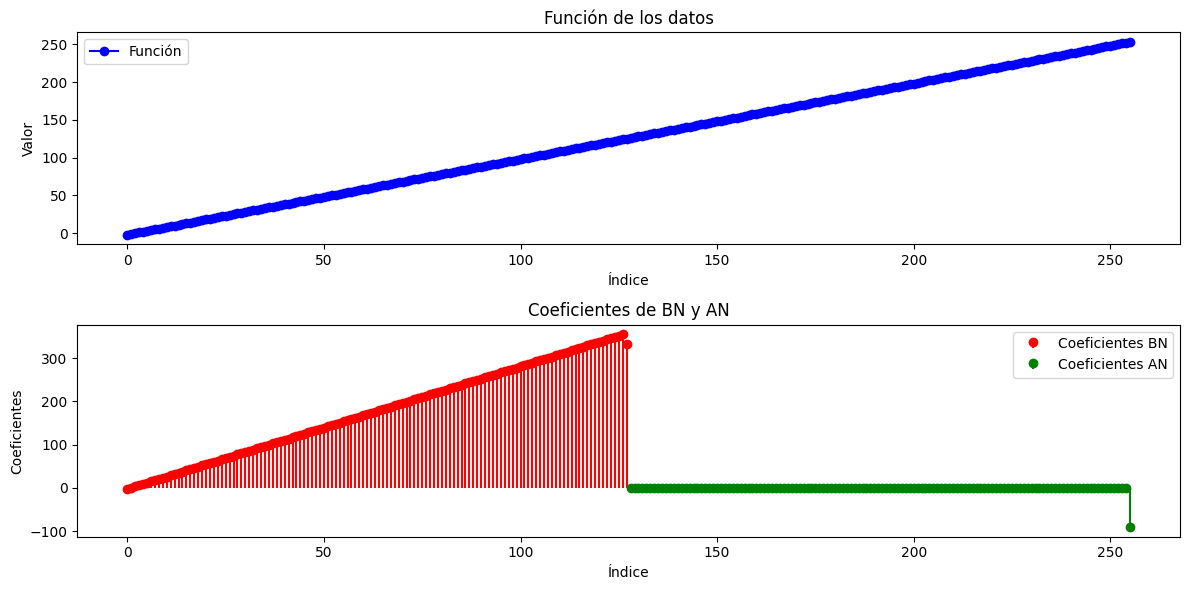

In [25]:
# Creamos una función de los datos (por ejemplo, x = y - 2)
N = 256
datos = np.arange(N)
funcion_datos = datos - 2

# Llamámos a nuestra función
DWT (N,funcion_datos)

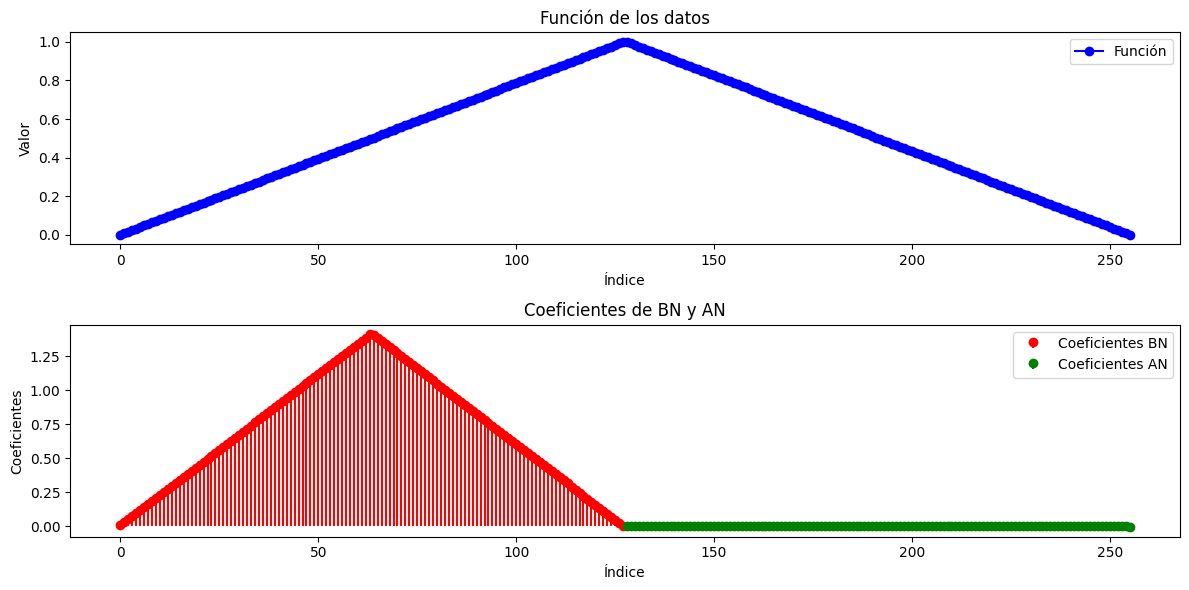

In [26]:
# Creamos una función de los datos
N = 256
datos = np.concatenate((np.linspace(0, 1, N // 2), np.linspace(1, 0, N // 2)))

# Llamámos a nuestra función
DWT (N,datos)

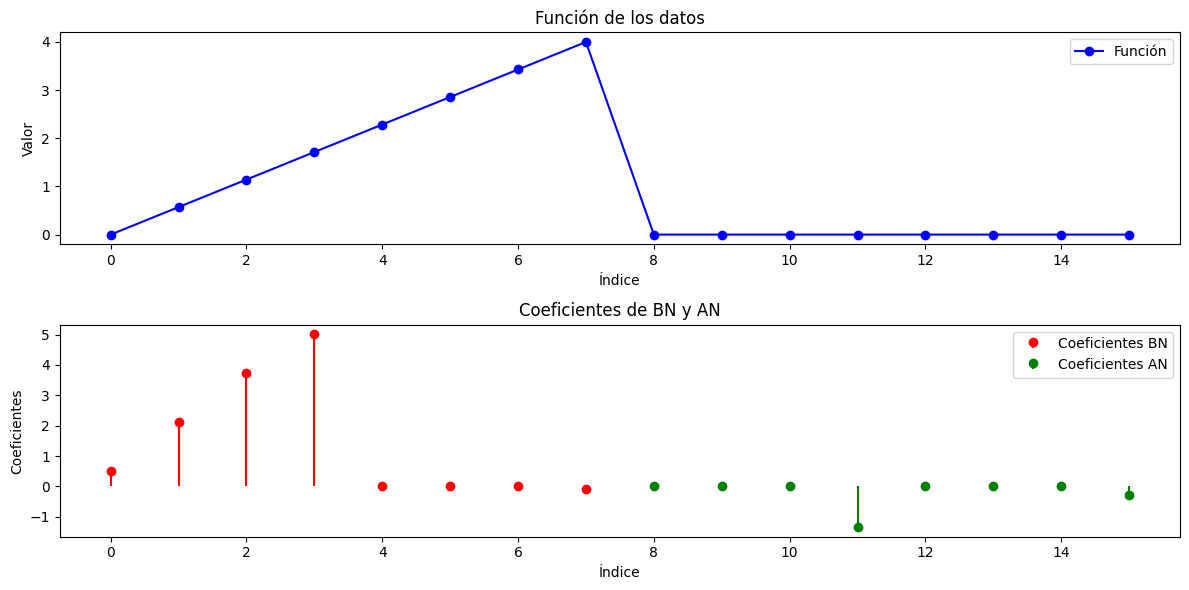

In [27]:
# Creamos la función que crece hasta x = 4 (índice 8) y luego se mantiene constante en 2
N = 16
datos = np.concatenate((
    np.linspace(0, 4, N // 2),  # Crece linealmente hasta el valor 4
    np.ones(N // 2) * 0         # Se mantiene constante en 2
))

# Llamámos a nuestra función
DWT (N,datos)

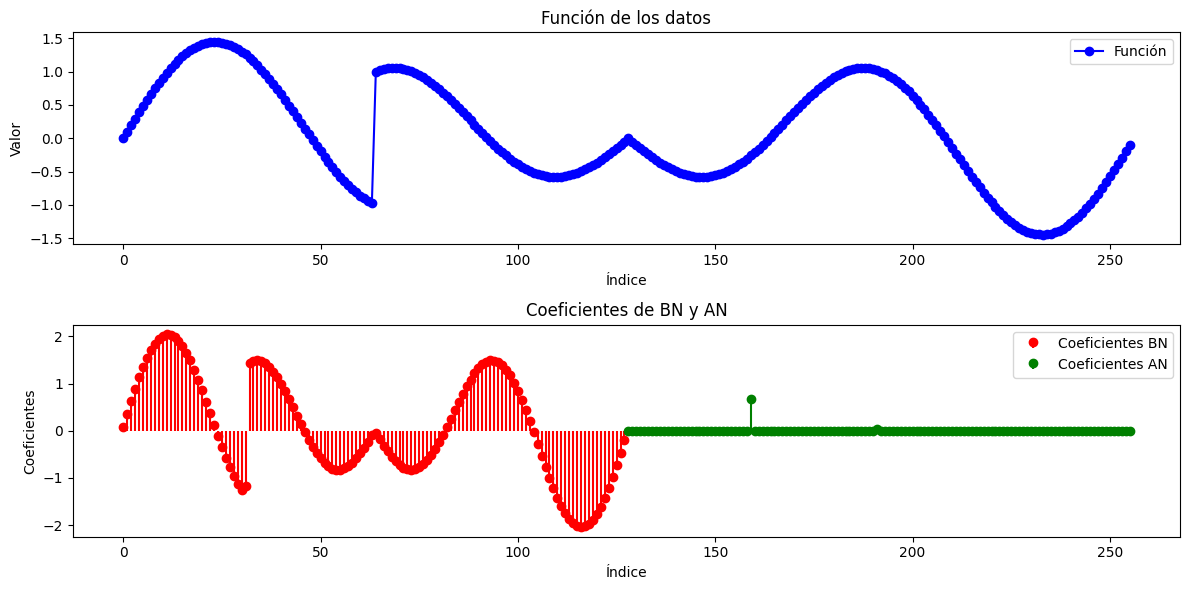

In [28]:
# Parámetros
N = 256
omega = 2 * np.pi / N

# Definir el array de índices j
j = np.arange(N)
datos = np.where((N / 4 <= j) & (j < N / 2), - np.sin(3 * omega * j) - 0.5 * np.sin(2 * omega * j), np.sin(3 * omega * j) 
                 + 0.5 * np.sin(2 * omega * j))

# Llamámos a nuestra función
DWT (N,datos)

In [29]:
def wavelet_transform(datos, max_etapas=None):
    """
    Realiza la transformada wavelet completa sobre una señal de entrada.

    Parámetros:
    datos (numpy array): Señal de entrada.
    max_etapas (int): Número máximo de etapas (opcional). Si es None, se calcula hasta el final.

    Retorno:
    resultado_wavelet (numpy array): Coeficientes de la transformada wavelet completa.
    """
    aproximaciones = []
    detalles = []

    b3 = (1 + np.sqrt(3)) / (4 * np.sqrt(2))
    b2 = (3 + np.sqrt(3)) / (4 * np.sqrt(2))
    b1 = (3 - np.sqrt(3)) / (4 * np.sqrt(2))
    b0 = (1 - np.sqrt(3)) / (4 * np.sqrt(2))

    nivel_datos = datos.copy()
    M = len(nivel_datos)
    assert (M & (M - 1)) == 0, "M debe ser una potencia de dos."

    etapa = 0
    while len(nivel_datos) > 2 and (max_etapas is None or etapa < max_etapas):
        etapa += 1
        M = len(nivel_datos)

        BN = np.zeros((M // 2, M))
        AN = np.zeros((M // 2, M))

        for i in range(M // 2):
            for j in range(4):
                BN[i, (2 * i + j) % M] = [b3, b2, b1, b0][j]
            for j in range(4):
                AN[i, (2 * i + j) % M] = [b0, -b1, b2, -b3][j]

        nuevo_detalle = AN @ nivel_datos
        nueva_aprox = BN @ nivel_datos

        detalles.append(nuevo_detalle)
        aproximaciones.append(nueva_aprox)

        nivel_datos = nueva_aprox

    resultado_wavelet = np.concatenate([aproximaciones[-1]] + detalles[::-1])
    return resultado_wavelet

Probamos la función diseñada.

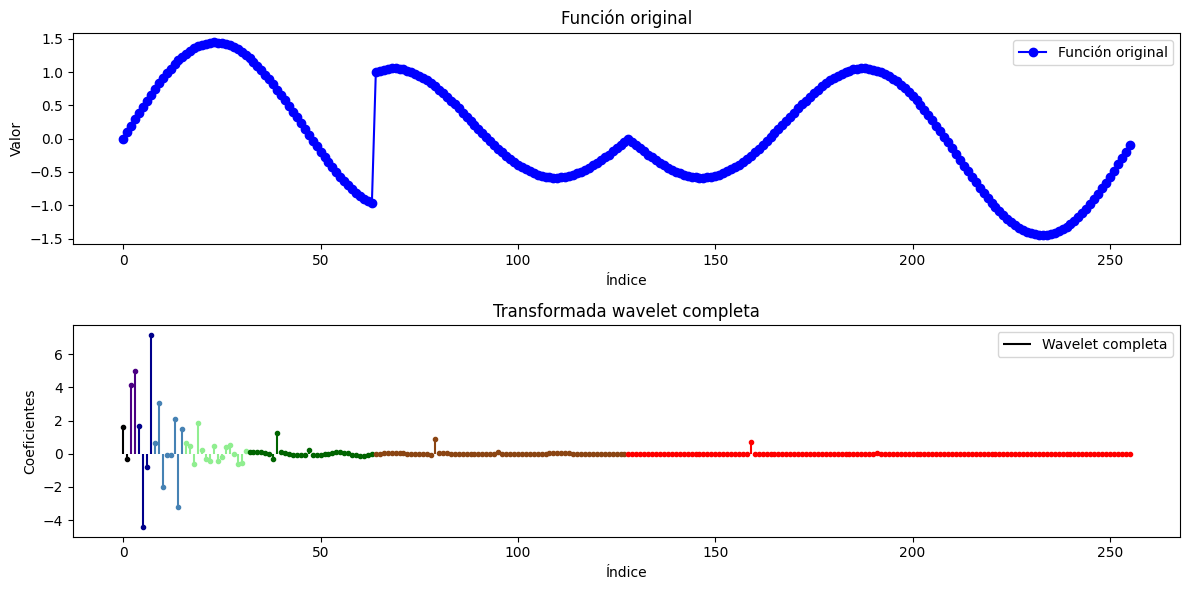

In [41]:
# Parámetros
N = 256
omega = 2 * np.pi / N

# Definir el array de índices j
j = np.arange(N)
datos = np.where((N / 4 <= j) & (j < N / 2), - np.sin(3 * omega * j) - 0.5 * np.sin(2 * omega * j),
                 np.sin(3 * omega * j) + 0.5 * np.sin(2 * omega * j))

# Calculamos la transformada wavelet completa
resultado_wavelet = wavelet_transform(datos)

# Función para asignar colores según el índice
def obtener_colores_wavelet(n):
    colores = []
    for i in range(n):
        if i < 2:
            colores.append('black')
        elif i < 4:
            colores.append('#4B0082')  # morado oscuro
        elif i < 8:
            colores.append('#00008B')  # azul oscuro
        elif i < 16:
            colores.append('#4682B4')  # azul claro
        elif i < 32:
            colores.append('#90EE90')  # verde claro
        elif i < 64:
            colores.append('#006400')  # verde oscuro
        elif i < 128:
            colores.append('#8B4513')  # marrón
        else:
            colores.append('red')
    return colores

# Obtener colores para el gráfico
colores = obtener_colores_wavelet(len(resultado_wavelet))

# Representar los resultados
plt.figure(figsize=(12, 6))

# Primera gráfica: La función original
plt.subplot(2, 1, 1)
plt.plot(datos, label="Función original", marker='o', color="blue")
plt.title("Función original")
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.legend()

# Segunda gráfica: Resultado de la wavelet completa con colores personalizados
plt.subplot(2, 1, 2)
for idx, (x, y, color) in enumerate(zip(range(len(resultado_wavelet)), resultado_wavelet, colores)):
    plt.vlines(x, 0, y, color=color)
    plt.plot(x, y, 'o', color=color, markersize=3)

plt.title("Transformada wavelet completa")
plt.xlabel("Índice")
plt.ylabel("Coeficientes")
plt.legend(["Wavelet completa"])
plt.tight_layout()
plt.show()

In [31]:
def hacer_zoom(x, y, x_min, x_max):
    """
    Hace un zoom en una gráfica entre dos valores del eje x.

    Parámetros:
    x (numpy array): Valores del eje x.
    y (numpy array): Valores del eje y.
    x_min (float): Valor mínimo del eje x para el zoom.
    x_max (float): Valor máximo del eje x para el zoom.

    Retorno:
    None
    """
    x = np.array(x)

    mask = (x >= x_min) & (x <= x_max)
    x_zoom = x[mask]
    y_zoom = y[mask]

    plt.figure(figsize=(8, 5))
    plt.plot(x_zoom, y_zoom, marker='o', color="red", label="Zoom")
    plt.title(f"Zoom entre {x_min} y {x_max}")
    plt.xlabel("Eje X")
    plt.ylabel("Eje Y")
    plt.legend()
    plt.grid(True)
    plt.show()

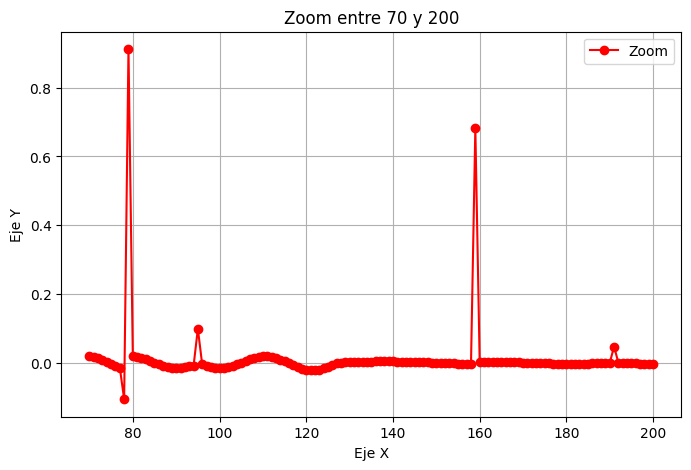

In [32]:
hacer_zoom(range(len(resultado_wavelet)), resultado_wavelet, 70, 200)

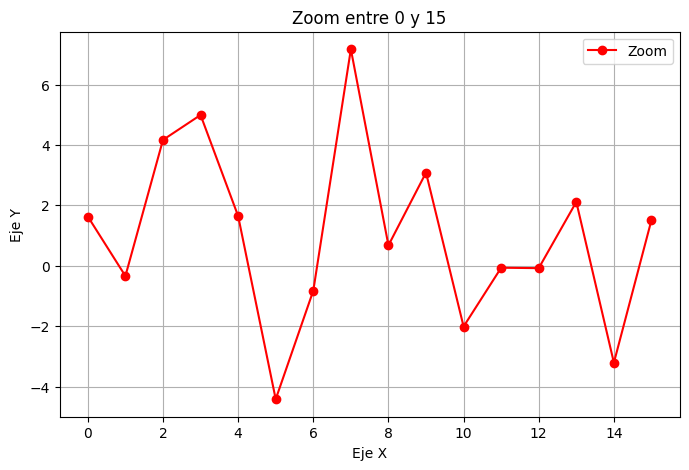

In [33]:
hacer_zoom(range(len(resultado_wavelet)), resultado_wavelet, 0, 15)

## PROBAMOS NUESTRO EJEMPLO DE SERIES DE FOURIER

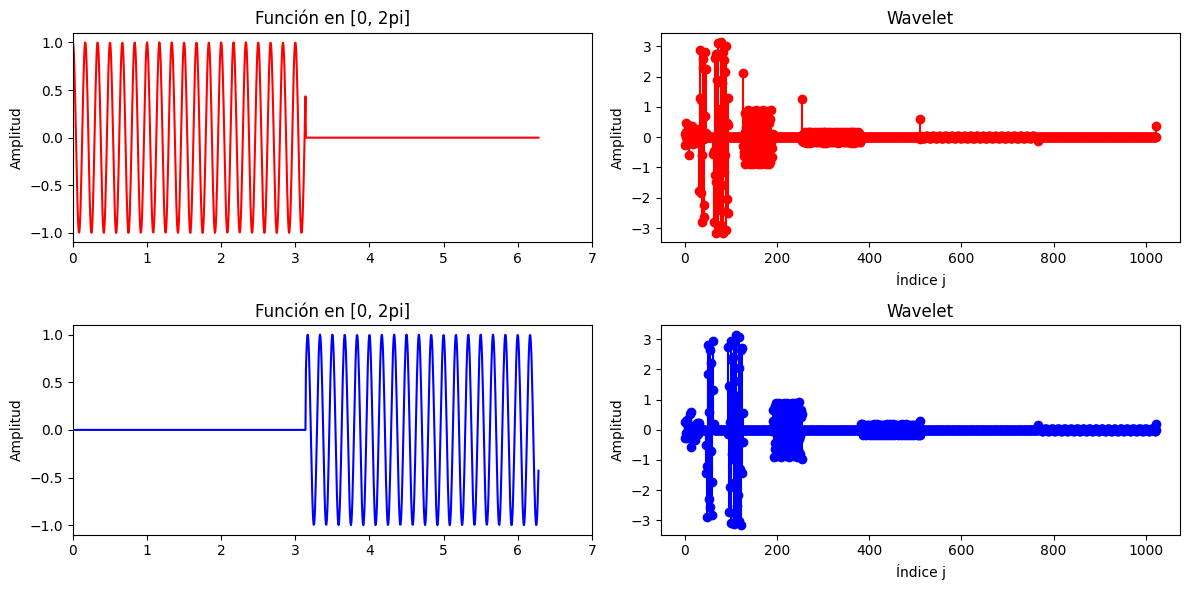

In [34]:
# Frecuencia de muestreo
sr = 162.9
ts = 1.0 / sr
t = np.arange(0, 2 * np.pi, ts)

# Señal roja: coseno en [0, π]
x = np.piecewise(t, [t < np.pi, t >= np.pi], [lambda t: np.cos(12 * np.pi * t), 0])
# Señal azul: coseno en [π, 2π]
y = np.piecewise(t, [t < np.pi, t >= np.pi], [0, lambda t: np.cos(12 * np.pi * t)])

# Transformadas wavelet
resultado_wavelet1 = wavelet_transform(x)
resultado_wavelet2 = wavelet_transform(y)

# Crear mosaico
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

# Señal roja
axs[0, 0].plot(t, x, 'r')
axs[0, 0].set_title("Función en [0, 2pi]")
axs[0, 0].set_xlim(0, 7)
axs[0, 0].set_ylabel("Amplitud")

# Wavelet roja
axs[0, 1].stem(range(len(resultado_wavelet1)), resultado_wavelet1, linefmt='r', markerfmt='ro', basefmt=' ')
axs[0, 1].set_title("Wavelet")
axs[0, 1].set_ylabel("Amplitud")
axs[0, 1].set_xlabel("Índice j")

# Señal azul
axs[1, 0].plot(t, y, 'b')
axs[1, 0].set_title("Función en [0, 2pi]")
axs[1, 0].set_xlim(0, 7)
axs[1, 0].set_ylabel("Amplitud")

# Wavelet azul
axs[1, 1].stem(range(len(resultado_wavelet2)), resultado_wavelet2, linefmt='b', markerfmt='bo', basefmt=' ')
axs[1, 1].set_title("Wavelet")
axs[1, 1].set_ylabel("Amplitud")
axs[1, 1].set_xlabel("Índice j")

plt.tight_layout()
plt.show()

# **Programamos la función inversa**

In [35]:
def inverse_wavelet_transform(resultado_wavelet):
    """
    Realiza la transformada wavelet inversa para reconstruir los datos originales.

    Parámetros:
    resultado_wavelet (numpy array): Coeficientes de la transformada wavelet completa.

    Retorno:
    datos (numpy array): Señal reconstruida.
    """
    b3 = (1 + np.sqrt(3)) / (4 * np.sqrt(2))
    b2 = (3 + np.sqrt(3)) / (4 * np.sqrt(2))
    b1 = (3 - np.sqrt(3)) / (4 * np.sqrt(2))
    b0 = (1 - np.sqrt(3)) / (4 * np.sqrt(2))

    tamaño_datos = len(resultado_wavelet)
    assert (tamaño_datos & (tamaño_datos - 1)) == 0, "El tamaño debe ser una potencia de dos."

    aproximacion = resultado_wavelet[:2]
    i = 2
    j = 4

    while len(aproximacion) < tamaño_datos:
        detalle_actual = resultado_wavelet[i:j]
        M = len(detalle_actual) * 2

        BN = np.zeros((M // 2, M))
        AN = np.zeros((M // 2, M))

        for k in range(M // 2):
            for l in range(4):
                BN[k, (2 * k + l) % M] = [b3, b2, b1, b0][l]
                AN[k, (2 * k + l) % M] = [b0, -b1, b2, -b3][l]

        aproximacion = aproximacion.reshape(-1, 1)
        detalle_actual = detalle_actual.reshape(-1, 1)

        nueva_aprox = BN.T @ aproximacion
        nuevo_detalle = AN.T @ detalle_actual

        reconstruido = nueva_aprox.flatten() + nuevo_detalle.flatten()
        aproximacion = reconstruido

        i = j
        j = j * 2

    return aproximacion

Comprobamos que la función está bien programada.

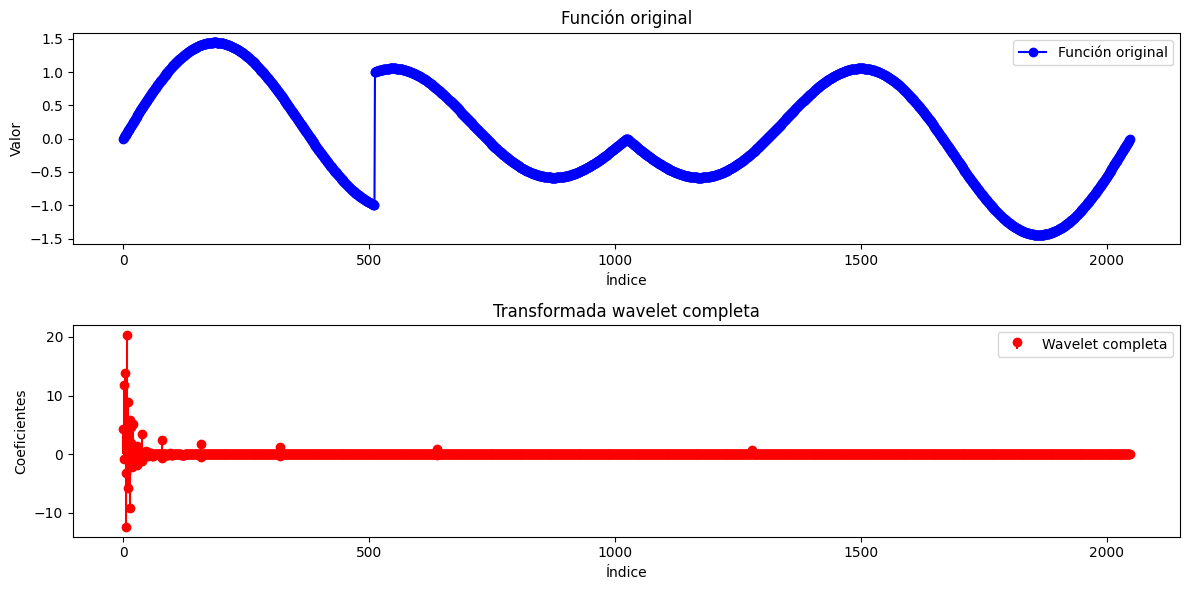

In [36]:
# Parámetros
N = 2048
omega = 2 * np.pi / N

# Definir el array de índices j
j = np.arange(N)
datos = np.where((N / 4 <= j) & (j < N / 2), - np.sin(3 * omega * j) - 0.5 * np.sin(2 * omega * j), np.sin(3 * omega * j) +
                  0.5 * np.sin(2 * omega * j))


# Calculamos la transformada wavelet completa
resultado_wavelet = wavelet_transform(datos)

# Representamos los resultados
plt.figure(figsize=(12, 6))

# Primera gráfica: La función original
plt.subplot(2, 1, 1)
plt.plot(datos, label="Función original", marker='o', color="blue")
plt.title("Función original")
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.legend()

# Segunda gráfica: Resultado de la wavelet completa
plt.subplot(2, 1, 2)
plt.stem(range(len(resultado_wavelet)), resultado_wavelet, basefmt=" ", linefmt='r-', markerfmt='ro', label="Wavelet completa")
plt.title("Transformada wavelet completa")
plt.xlabel("Índice")
plt.ylabel("Coeficientes")
plt.legend()  
plt.tight_layout()
plt.show()

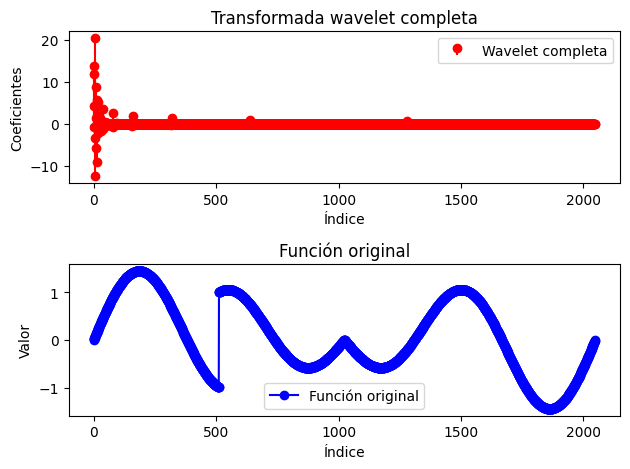

In [37]:
# Aplicamos la función inversa
resultado_inicial = inverse_wavelet_transform(resultado_wavelet)

# Primera gráfica: La función inicial
plt.subplot(2, 1, 1)
plt.stem(range(len(resultado_wavelet)), resultado_wavelet, basefmt=" ", linefmt='r-', markerfmt='ro', label="Wavelet completa")
plt.title("Transformada wavelet completa")
plt.xlabel("Índice")
plt.ylabel("Coeficientes")
plt.legend()


# Segunda gráfica: La wavelet original
plt.subplot(2, 1, 2)
plt.plot(range(len(resultado_inicial)), resultado_inicial, label="Función original", marker='o', color="blue")
plt.title("Función original")
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
def vector_base_canonica(n, i):
    """
    Genera un vector de la base canónica de tamaño n con 1 en la posición i.

    Args:
        n (int): Tamaño del vector.
        i (int): Posición del 1 en el vector.

    Returns:
        numpy.ndarray: Vector de la base canónica.
    """
    if i < 1 or i > n:
        raise ValueError("La posición i debe estar entre 1 y n (inclusive).")
    
    
    vector = np.zeros(n, dtype=float) 
    vector[i - 1] = 1
    return vector

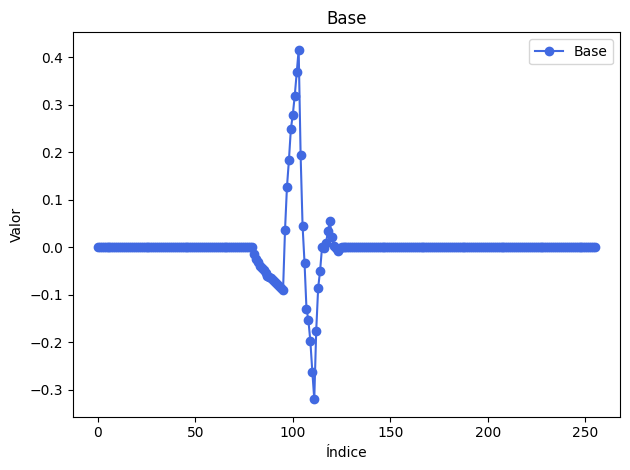

In [46]:
# Aplicamos la función
resultado_inicial = inverse_wavelet_transform(vector_base_canonica(256,22))

# Representamos los resultados
plt.plot(range(len(resultado_inicial)), resultado_inicial, label="Base", marker='o', color="#4169E1")
plt.title("Base")
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.legend()
plt.tight_layout()
plt.show()

In [48]:
# Parámetros
# Tamaño del vector base
N = 256 
# Lista para almacenar los fotogramas 
frames = []  

# Crear imágenes para los vectores de la base canónica del 1 al 22
for i in range(1, 23):
    resultado_inicial = inverse_wavelet_transform(vector_base_canonica(N, i))

    # Crear la figura
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(range(len(resultado_inicial)), resultado_inicial, label="Base", marker='o', color="blue")
    ax.set_title(f"Base Canónica - Vector {i}")
    ax.set_xlabel("Índice")
    ax.set_ylabel("Valor")
    ax.legend()
    ax.grid(True)

    # Guardar el fotograma temporalmente
    filename = f"frame_{i}.png"
    plt.savefig(filename)
    plt.close()
    frames.append(imageio.imread(filename))

# Guardar como GIF
imageio.mimsave("base_canonica.gif", frames, duration=1000)

print("GIF generado como 'base_canonica.gif'")

C:\Users\javie\AppData\Local\Temp\ipykernel_19160\2527702625.py:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))


GIF generado como 'base_canonica.gif'


## Ejemplo Final Wavelets

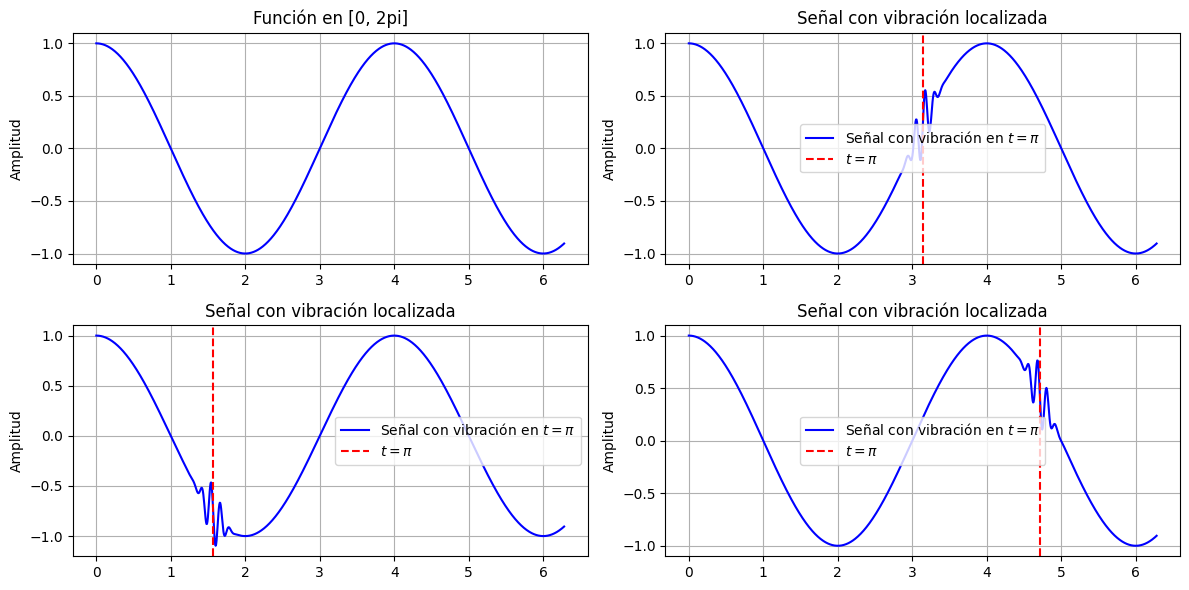

In [53]:
# Puntos de la muestra
sr = 162.9  
ts = 1.0 / sr  
t = np.arange(0, 2*np.pi, ts)



# Frecuencia de la señal del coseno
freq = 1.0  
# Definir el coseno en todo el intervalo [0, 2*pi]
x = np.cos( np.pi/2 * freq * t)  

resultado_wavelet = wavelet_transform(x)


 
# Introducir una vibración central
vibracion = 0.3 * np.sin(50 * t) * np.exp(-50 * (t - np.pi)**2)
# Añadir la vibración
y = x + vibracion 

resultado_wavelet1 = wavelet_transform(y)



# Introducir una vibración izquierda
vibracion = 0.3 * np.sin(50 * t) * np.exp(-50 * (t - 0.5*np.pi)**2)
# Añadir la vibración
z = x + vibracion 

resultado_wavelet2 = wavelet_transform(z)



# Introducir una vibración derecha
vibracion = 0.3 * np.sin(50 * t) * np.exp(-50 * (t - 1.5*np.pi)**2)
# Añadir la vibración
k = x + vibracion

resultado_wavelet3 = wavelet_transform(k)




# Crear mosaico
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

# Señal sin oscilación
axs[0, 0].plot(t, x, 'blue')
axs[0, 0].set_title("Función en [0, 2pi]")
axs[0, 0].grid(True)
axs[0, 0].set_ylabel("Amplitud")

# Oscilación central
axs[0, 1].plot(t, y, label="Señal con vibración en $t=\pi$", color="blue")
axs[0, 1].axvline(np.pi, color='red', linestyle='--', label="$t = \pi$")
axs[0, 1].set_ylabel("Amplitud")
axs[0, 1].set_title("Señal con vibración localizada")
axs[0, 1].legend()
axs[0, 1].grid(True)

# Oscilación izquierda
axs[1, 0].plot(t, z, label="Señal con vibración en $t=\pi$", color="blue")
axs[1, 0].axvline(0.5*np.pi, color='red', linestyle='--', label="$t = \pi$")
axs[1, 0].set_ylabel("Amplitud")
axs[1, 0].set_title("Señal con vibración localizada")
axs[1, 0].legend()
axs[1, 0].grid(True)

# Oscilación derecha
axs[1, 1].plot(t, k, label="Señal con vibración en $t=\pi$", color="blue")
axs[1, 1].axvline(1.5*np.pi, color='red', linestyle='--', label="$t = \pi$")
axs[1, 1].set_ylabel("Amplitud")
axs[1, 1].set_title("Señal con vibración localizada")
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

Calculamos sus transformadas wavelet.

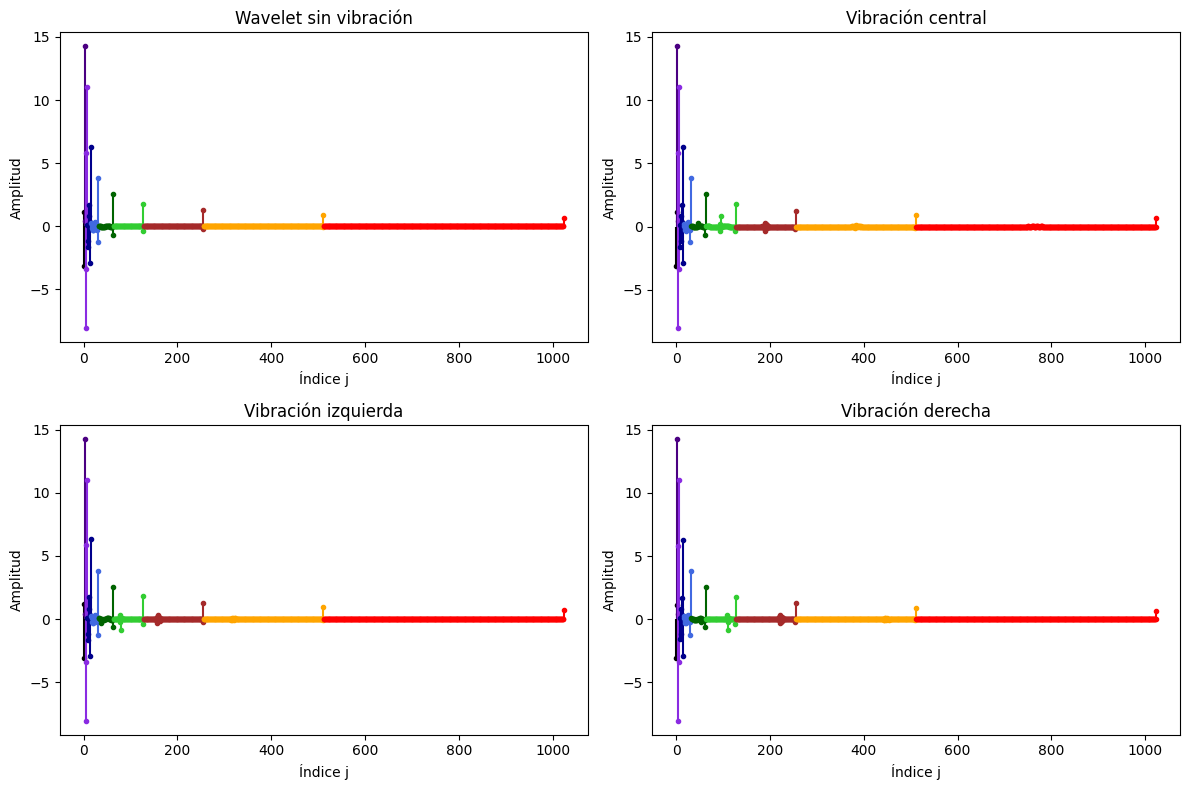

In [54]:
# Función para asignar colores según el índice
def obtener_colores(n):
    colores = []
    for i in range(n):
        if i < 2:
            colores.append('black')
        elif i < 4:
            colores.append('#4B0082')  # morado oscuro
        elif i < 8:
            colores.append('#8A2BE2')  # morado claro
        elif i < 16:
            colores.append('#00008B')  # azul oscuro
        elif i < 32:
            colores.append('#4169E1')  # azul claro
        elif i < 64:
            colores.append('#006400')  # verde oscuro
        elif i < 128:
            colores.append('#32CD32')  # verde claro
        elif i < 256:
            colores.append('brown')
        elif i < 512:
            colores.append('orange')
        else:
            colores.append('red')
    return colores

# Obtenemos la lista de colores
colores = obtener_colores(1024)

# Crear la figura y los subgráficos
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Dibujar cada gráfico
for ax, datos, titulo in zip(axs.flatten(),
                             [resultado_wavelet, resultado_wavelet1, resultado_wavelet2, resultado_wavelet3],
                             ['Wavelet sin vibración', 'Vibración central', 'Vibración izquierda', 'Vibración derecha']):
    
    # Dibujar cada barra a mano
    for idx, (x, y, color) in enumerate(zip(range(len(datos)), datos, colores)):
        ax.vlines(x, 0, y, color=color)  # línea vertical
        ax.plot(x, y, 'o', color=color, markersize=3)  # puntito arriba

    ax.set_title(titulo)
    ax.set_xlabel('Índice j')
    ax.set_ylabel('Amplitud')

plt.tight_layout()
plt.show()

Hacemos zoom.

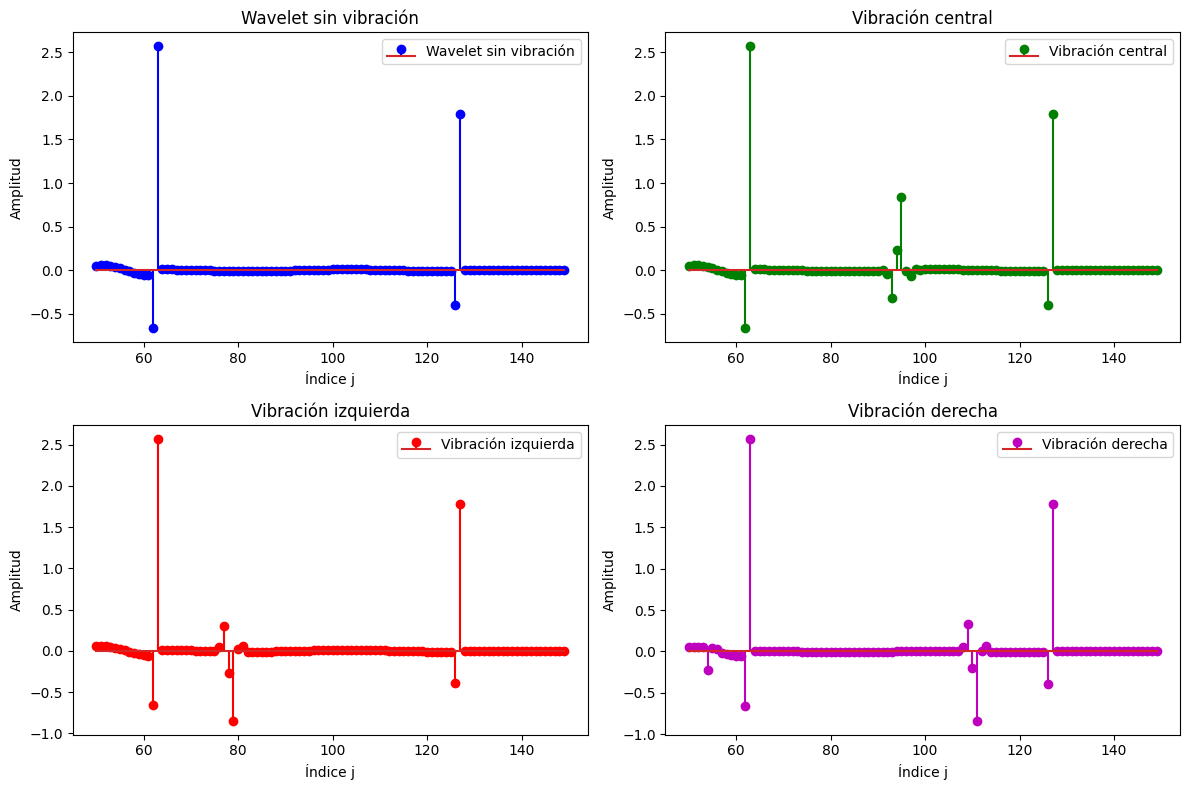

In [55]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2 filas, 2 columnas

# Rango de índices deseado
inicio, fin = 50, 150

# Primer gráfico
axs[0, 0].stem(range(inicio, fin), resultado_wavelet[inicio:fin], 'b', label="Wavelet sin vibración")
axs[0, 0].set_title(r'Wavelet sin vibración')
axs[0, 0].set_xlabel('Índice j')
axs[0, 0].set_ylabel('Amplitud')
axs[0, 0].legend()

# Segundo gráfico
axs[0, 1].stem(range(inicio, fin), resultado_wavelet1[inicio:fin], 'g', label="Vibración central")
axs[0, 1].set_title(r'Vibración central')
axs[0, 1].set_xlabel('Índice j')
axs[0, 1].set_ylabel('Amplitud')
axs[0, 1].legend()

# Tercer gráfico
axs[1, 0].stem(range(inicio, fin), resultado_wavelet2[inicio:fin], 'r', label="Vibración izquierda")
axs[1, 0].set_title(r'Vibración izquierda')
axs[1, 0].set_xlabel('Índice j')
axs[1, 0].set_ylabel('Amplitud')
axs[1, 0].legend()

# Cuarto gráfico
axs[1, 1].stem(range(inicio, fin), resultado_wavelet3[inicio:fin], 'm', label="Vibración derecha")
axs[1, 1].set_title(r'Vibración derecha')
axs[1, 1].set_xlabel('Índice j')
axs[1, 1].set_ylabel('Amplitud')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

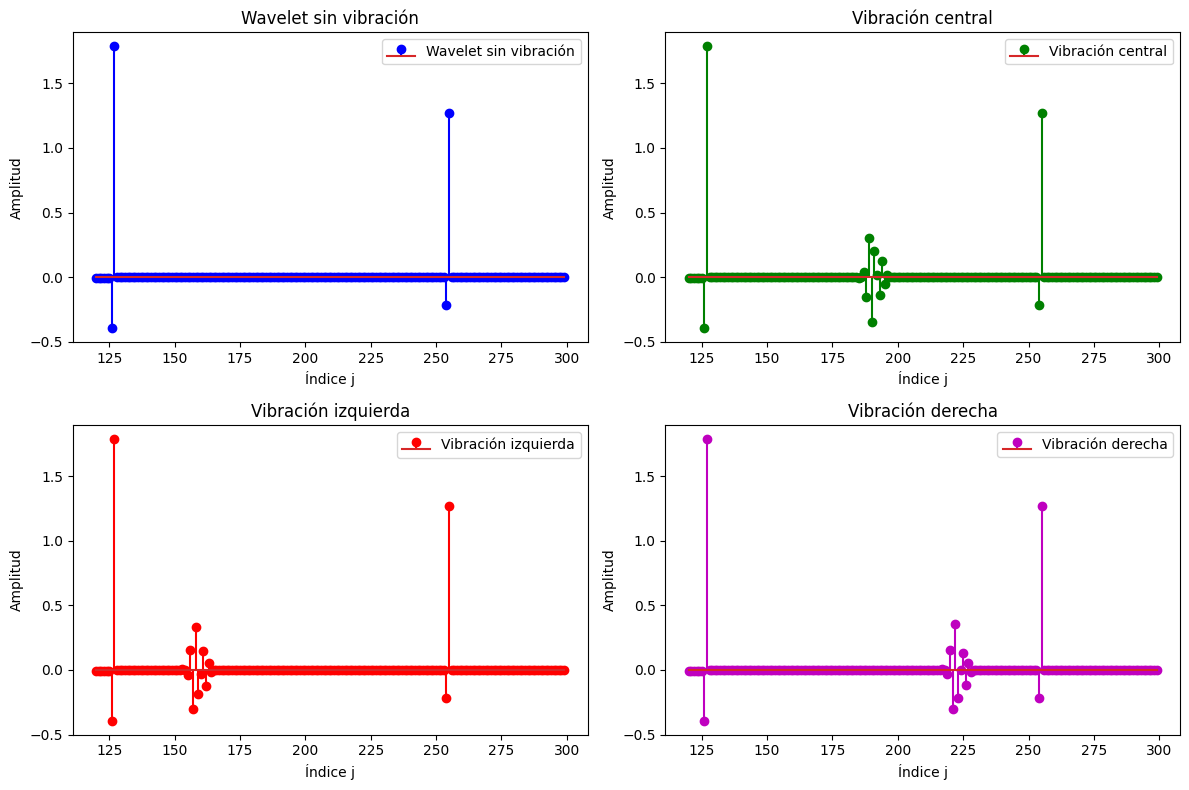

In [56]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2 filas, 2 columnas

# Rango de índices deseado
inicio, fin = 120, 300

# Primer gráfico
axs[0, 0].stem(range(inicio, fin), resultado_wavelet[inicio:fin], 'b', label="Wavelet sin vibración")
axs[0, 0].set_title(r'Wavelet sin vibración')
axs[0, 0].set_xlabel('Índice j')
axs[0, 0].set_ylabel('Amplitud')
axs[0, 0].legend()

# Segundo gráfico
axs[0, 1].stem(range(inicio, fin), resultado_wavelet1[inicio:fin], 'g', label="Vibración central")
axs[0, 1].set_title(r'Vibración central')
axs[0, 1].set_xlabel('Índice j')
axs[0, 1].set_ylabel('Amplitud')
axs[0, 1].legend()

# Tercer gráfico
axs[1, 0].stem(range(inicio, fin), resultado_wavelet2[inicio:fin], 'r', label="Vibración izquierda")
axs[1, 0].set_title(r'Vibración izquierda')
axs[1, 0].set_xlabel('Índice j')
axs[1, 0].set_ylabel('Amplitud')
axs[1, 0].legend()

# Cuarto gráfico
axs[1, 1].stem(range(inicio, fin), resultado_wavelet3[inicio:fin], 'm', label="Vibración derecha")
axs[1, 1].set_title(r'Vibración derecha')
axs[1, 1].set_xlabel('Índice j')
axs[1, 1].set_ylabel('Amplitud')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

Localizamos las perturbaciones con vectores de la base.

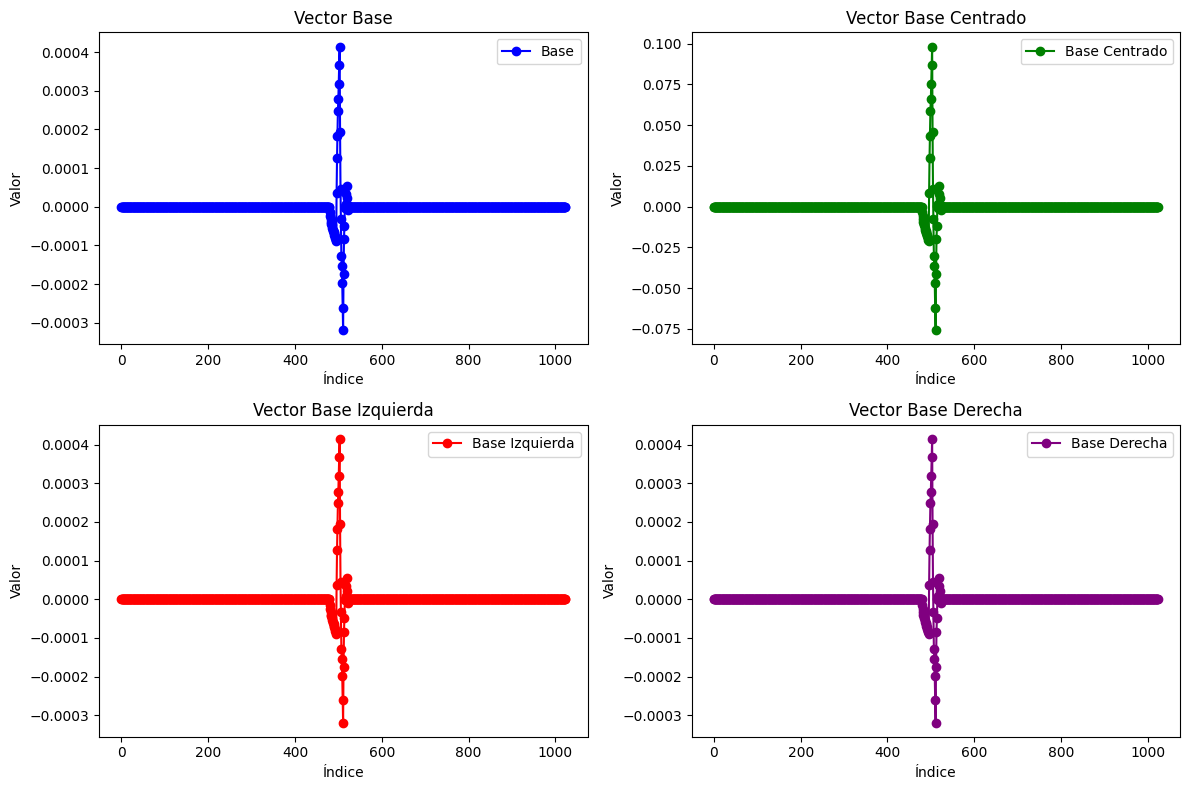

0.000996202619997999 0.23632098234545135 0.000996202619997999 0.000996202619997999


In [59]:
# Generamos los vectores adecuados (1, 90, 95, 79)
i = 95    
n = 1024

vector = np.zeros(n, dtype=float)
vector[i - 1] = resultado_wavelet[i-1]

vector1 = np.zeros(n, dtype=float)
vector1[i - 1] = resultado_wavelet1[i-1]

vector2 = np.zeros(n, dtype=float)
vector2[i - 1] = resultado_wavelet2[i-1]

vector3 = np.zeros(n, dtype=float)
vector3[i - 1] = resultado_wavelet3[i-1]


# Generar los resultados para los cuatro vectores de la base canónica
resultado_base = inverse_wavelet_transform(vector)
resultado_base1 = inverse_wavelet_transform(vector1)
resultado_base2 = inverse_wavelet_transform(vector2)
resultado_base3 = inverse_wavelet_transform(vector3)

# Crear una figura con 2 filas y 2 columnas
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Primer gráfico
axs[0, 0].plot(range(len(resultado_base)), resultado_base, label="Base", marker='o', color="blue")
axs[0, 0].set_title("Vector Base")
axs[0, 0].set_xlabel("Índice")
axs[0, 0].set_ylabel("Valor")
axs[0, 0].legend()

# Segundo gráfico
axs[0, 1].plot(range(len(resultado_base1)), resultado_base1, label="Base Centrado", marker='o', color="green")
axs[0, 1].set_title("Vector Base Centrado")
axs[0, 1].set_xlabel("Índice")
axs[0, 1].set_ylabel("Valor")
axs[0, 1].legend()

# Tercer gráfico
axs[1, 0].plot(range(len(resultado_base2)), resultado_base2, label="Base Izquierda", marker='o', color="red")
axs[1, 0].set_title("Vector Base Izquierda")
axs[1, 0].set_xlabel("Índice")
axs[1, 0].set_ylabel("Valor")
axs[1, 0].legend()

# Cuarto gráfico
axs[1, 1].plot(range(len(resultado_base3)), resultado_base3, label="Base Derecha", marker='o', color="purple")
axs[1, 1].set_title("Vector Base Derecha")
axs[1, 1].set_xlabel("Índice")
axs[1, 1].set_ylabel("Valor")
axs[1, 1].legend()

plt.tight_layout()
plt.show()

print(resultado_wavelet[i-1], resultado_wavelet1[i-1], resultado_wavelet2[i-1], resultado_wavelet3[i-1])

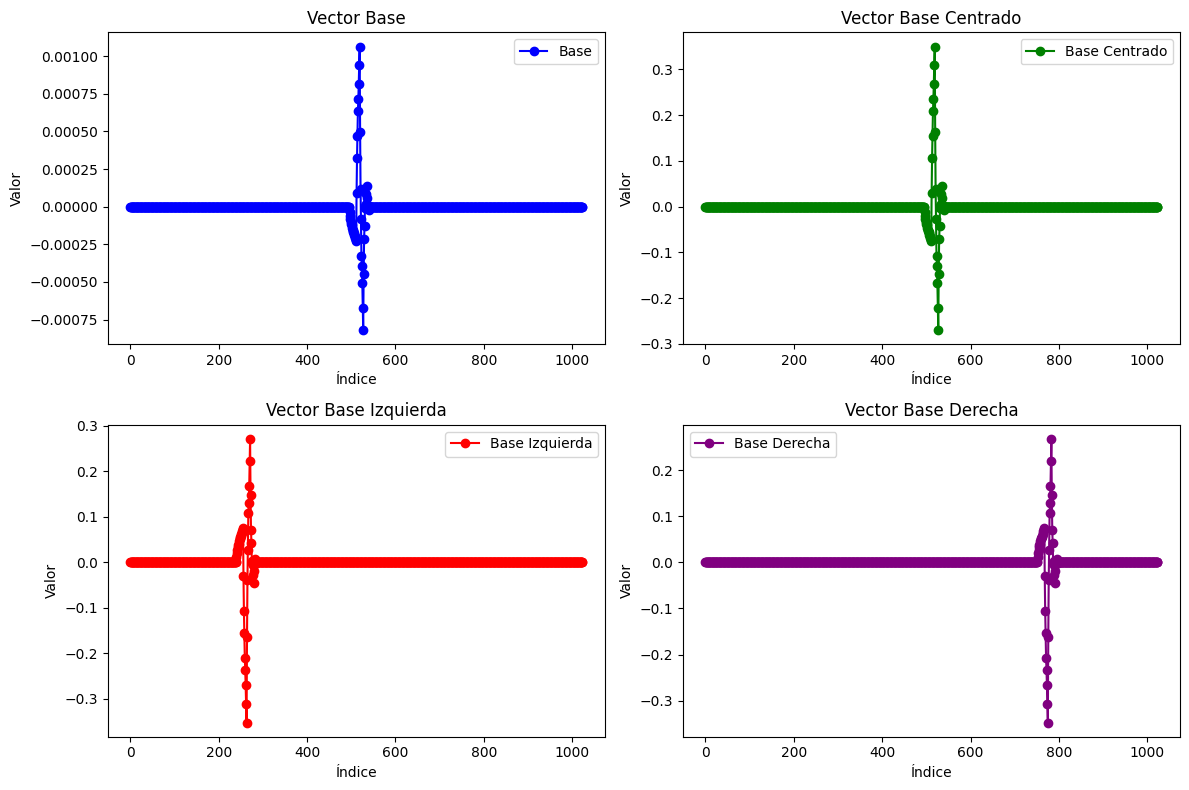

0.002559294071828977 0.8422611667441567 -0.8464453513927355 -0.8358499225773879


In [77]:
# Generamos los vectores maximos en cada caso (1, 90, 95, 79)
i = 96
j = 80
k = 112   
n = 1024

vector = np.zeros(n, dtype=float)
vector[i - 1] = resultado_wavelet[i-1]

vector1 = np.zeros(n, dtype=float)
vector1[i - 1] = resultado_wavelet1[i-1]

vector2 = np.zeros(n, dtype=float)
vector2[j - 1] = resultado_wavelet2[j-1]

vector3 = np.zeros(n, dtype=float)
vector3[k - 1] = resultado_wavelet3[k-1]


# Generar los resultados para los cuatro vectores de la base canónica
resultado_base = inverse_wavelet_transform(vector)
resultado_base1 = inverse_wavelet_transform(vector1)
resultado_base2 = inverse_wavelet_transform(vector2)
resultado_base3 = inverse_wavelet_transform(vector3)

# Crear una figura con 2 filas y 2 columnas
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Primer gráfico
axs[0, 0].plot(range(len(resultado_base)), resultado_base, label="Base", marker='o', color="blue")
axs[0, 0].set_title("Vector Base")
axs[0, 0].set_xlabel("Índice")
axs[0, 0].set_ylabel("Valor")
axs[0, 0].legend()

# Segundo gráfico
axs[0, 1].plot(range(len(resultado_base1)), resultado_base1, label="Base Centrado", marker='o', color="green")
axs[0, 1].set_title("Vector Base Centrado")
axs[0, 1].set_xlabel("Índice")
axs[0, 1].set_ylabel("Valor")
axs[0, 1].legend()

# Tercer gráfico
axs[1, 0].plot(range(len(resultado_base2)), resultado_base2, label="Base Izquierda", marker='o', color="red")
axs[1, 0].set_title("Vector Base Izquierda")
axs[1, 0].set_xlabel("Índice")
axs[1, 0].set_ylabel("Valor")
axs[1, 0].legend()

# Cuarto gráfico
axs[1, 1].plot(range(len(resultado_base3)), resultado_base3, label="Base Derecha", marker='o', color="purple")
axs[1, 1].set_title("Vector Base Derecha")
axs[1, 1].set_xlabel("Índice")
axs[1, 1].set_ylabel("Valor")
axs[1, 1].legend()

plt.tight_layout()
plt.show()

print(resultado_wavelet[i-1], resultado_wavelet1[i-1], resultado_wavelet2[j-1], resultado_wavelet3[k-1])